In [1]:
import networkx as nx
import numpy as np

In [2]:
import sys
path_granular = '/orange/physics-dept/an.kandala/Biophysics_projeccts/granular_learner/granular_learner_ananth/granular_learner'
#append to PATH
sys.path.append(path_granular)
from granular_learner import Granular_learner

In [3]:
epsilon = 4
r1 = 1
r2 = 1.4*r1
Lx = 30
Ly = 15
inner_radii = [r1, r2]
prob = [0.4, 0.6]
#place input boundary spheres:
boundary_sphere_radius = 1
boundary_sphere_gap = 0 # gap between boundary spheres 
n_spheres = 100
learner = Granular_learner(Lx, Ly, inner_radii, boundary_sphere_radius, boundary_sphere_gap,epsilon)
learner.initialize_(n_spheres, prob)

In [4]:
print(tuple(np.arange(10)))

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)


In [50]:
#adjacency matrix:
import networkx as nx
G = nx.Graph()
cut_offs = learner.inner_cutoffs
inner_positions = learner.inner_spheres[:, :-1]
pos = {i: tuple(inner_positions[i]) for i in range(len(inner_positions))}
G.add_nodes_from(pos.keys())
for n, p in pos.items():
    G.nodes[n]['pos'] = p

uti = np.triu_indices(len(inner_positions), k=1) #obtain unique indices of the inner sphere combinations
r_diff_vec = inner_positions[uti[0]] - inner_positions[uti[1]] #calculate the difference in positions
r_diff_vec[:, 1] = r_diff_vec[:, 1] + Ly*(r_diff_vec[:, 1] < -Ly/2) - Ly*(r_diff_vec[:, 1] > Ly/2) #periodic boundary conditions in the y direction
epsilon = 2; alpha = 2
r_diff = np.linalg.norm(r_diff_vec, axis = 1)
neighbors = np.where(r_diff < cut_offs)
#Add edges to the graph:
for nb in neighbors[0]:
    G.add_edge(uti[0][nb], uti[1][nb], edge = r_diff[nb])

NameError: name 'obj' is not defined

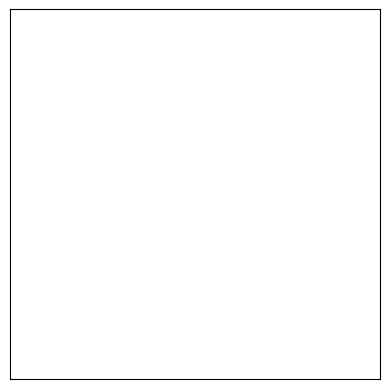